In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Brain'

In [38]:
%cd /content/gdrive/MyDrive/Brain

/content/gdrive/MyDrive/Brain


In [39]:
!ls

kaggle.json


In [40]:
!kaggle datasets download -d preetviradiya/brian-tumor-dataset

100% 107M/107M [00:06<00:00, 21.3MB/s]
100% 107M/107M [00:06<00:00, 16.5MB/s]


In [41]:
!mkdir Brain-tumor
!mv brian-tumor-dataset.zip Brain-tumor


In [42]:
%cd Brain-tumor/

/content/gdrive/MyDrive/Brain/Brain-tumor


In [43]:
!unzip brian-tumor-dataset.zip

Archive:  brian-tumor-dataset.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumo

In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.config.experimental_run_functions_eagerly(True)


In [49]:
img_dir = '/content/gdrive/MyDrive/Brain/Brain-tumor/Brain Tumor Data Set/Brain Tumor Data Set'

In [50]:
BATCH_SIZE = 64
IMAGE_SIZE = 150
input_shape = (150,150,1)


In [51]:
data_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [52]:
train_gen = data_gen.flow_from_directory(img_dir,
                                         target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                         batch_size = BATCH_SIZE,
                                         color_mode = "grayscale",
                                         shuffle = True,
                                         class_mode = "binary",
                                         subset = "training"
                                         )


Found 3681 images belonging to 2 classes.


In [53]:
val_gen = data_gen.flow_from_directory(img_dir,
                                         target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                         batch_size = BATCH_SIZE,
                                         color_mode = "grayscale",
                                         shuffle = False,
                                         class_mode = "binary",
                                         subset = "validation"
                                         )

Found 919 images belonging to 2 classes.


In [54]:
labels = train_gen.class_indices
classes = list(labels.keys())
print(classes)

['Brain Tumor', 'Healthy']


In [55]:
# Making Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout

In [56]:
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(150,150,1)))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))

In [57]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 512)               2

In [59]:
model.fit(train_gen,verbose=1, epochs=5, validation_data=val_gen,steps_per_epoch=3681//64, validation_steps=919//64)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


57/57 [==============================] - 27s 300ms/step - loss: 0.8474 - accuracy: 0.6243 - val_loss: 0.4620 - val_accuracy: 0.7902
Epoch 2/5
57/57 [==============================] - 18s 310ms/step - loss: 0.3545 - accuracy: 0.8573 - val_loss: 0.3430 - val_accuracy: 0.8359
Epoch 3/5
57/57 [==============================] - 17s 290ms/step - loss: 0.2040 - accuracy: 0.9240 - val_loss: 0.1733 - val_accuracy: 0.9364
Epoch 4/5
57/57 [==============================] - 15s 260ms/step - loss: 0.1200 - accuracy: 0.9630 - val_loss: 0.1032 - val_accuracy: 0.9643
Epoch 5/5
57/57 [==============================] - 15s 262ms/step - loss: 0.0721 - accuracy: 0.9806 - val_loss: 0.0813 - val_accuracy: 0.9743


In [60]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


<ipython-input-64-f282fca1e4fe>:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image,size,Image.ANTIALIAS)


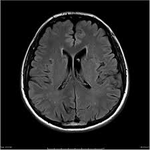

In [64]:
from matplotlib.pyplot import imshow
from PIL import Image,ImageOps


data = np.ndarray(shape=(1,150,150,1),dtype=np.float32)
image = Image.open(f'/content/gdrive/MyDrive/Brain/Brain-tumor/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1010).jpg')
size = (150,150)
image = ImageOps.grayscale(image)
image = ImageOps.fit(image,size,Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)
data = image_array.reshape((-1,150,150,1))

In [65]:
prediction = model.predict(data)
print(prediction[0][0])

1/1 [==============================] - 0s 92ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1.0
